<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/fa23_Dhairya890_ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

some comments throught but rather for future research; this is excellent, its an A for the course, no need for more work, can relax, great job!!

# **TITLE**

### *Exploring Crime, Education,Suicide rate and Unemployment: A GIS Project in India*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare crime rates,education,Suicide rate and Unemployment status across different districts of India. By examining these three critical dimensions – population density, crime rates, and education levels*

#**DATASET SOURCES**

### Population Density Data:

#### https://www.kaggle.com/datasets/imdevskp/india-district-wise-shape-files

## Education Data:

#### https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::india-education-2014-15/explore?showTable=true

## Crime Data:

#### https://data.gov.in/catalog/district-wise-crimes-under-various-sections-indian-penal-code-ipc-crimes

## SUICIDE DATA

#### https://data.gov.in/search?title=suicide

## UNEMPLOYMENT DATA

#### https://www.rbi.org.in/Scripts/PublicationsView.aspx?id=20001

## POLICE ST DATA

#### https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::openstreetmap-police/explore?location=18.893903%2C83.155077%2C4.65



## Importing libraries and setting up DataFrames

In [1]:
!pip install mapclassify
!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import mapclassify
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
! wget -q -O IND.zip https://drive.google.com/uc?id=1opoGF1mPFkiZwwk-rloTDRAprs2gfCn_&export=download
! wget -q -O education.csv https://drive.google.com/uc?id=1ckGy6E6jDCLkhQgZnDcG8pV4KjqHpuFb&export=download
! wget -q -O crime.csv https://drive.google.com/uc?id=18RF0JXp9V1TnAd_EFy1Sy72wKrQQXLIt&export=download
! wget -q -O suicide.csv https://drive.google.com/uc?id=1EjHqHlxagt7S6yxVWQiN4oZcTP2j2Vk7&export=download
! wget -q -O unemp.csv https://drive.google.com/uc?id=1HMINnaozQDQn6Nkj5X-rXYaxy37yG3RV&export=download

zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind = gpd.read_file('INDIA-MAP.shp')

df_edu = pd.read_csv("education.csv")
df_crime = pd.read_csv("crime.csv")
df_suicide = pd.read_csv("suicide.csv")
df_suicide_main = pd.read_csv("suicide.csv")
df_unemp = pd.read_csv("unemp.csv")

In [3]:
# Removing NA values
l1 = list(Ind.isna().sum())
for i in range(len(l1)):
  if l1[i] != 0:
    print("Col name: ",Ind.columns[i],"\tTotal Counts: ",l1[i])
    Ind[f'{Ind.columns[i]}'].fillna(Ind[f'{Ind.columns[i]}'].mean(),inplace=True)

Col name:  distarea 	Total Counts:  64
Col name:  totalpopul 	Total Counts:  33
Col name:  totalhh 	Total Counts:  33
Col name:  totpopmale 	Total Counts:  33
Col name:  totpopfema 	Total Counts:  33


## Dissolving Districts

<Axes: >

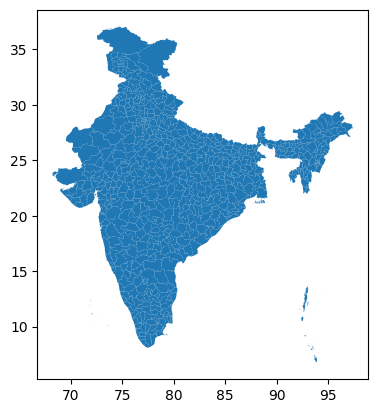

In [4]:
Ind.plot()

In [5]:
states = Ind.dissolve(by='statename',aggfunc='sum').reset_index()
states = states[['statename', 'distarea', 'totalpopul','totpopmale', 'totpopfema', 'geometry']]
states['statename'] = states['statename'].str.upper()

<ipython-input-5-a078edf64242>:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  states = Ind.dissolve(by='statename',aggfunc='sum').reset_index()


<Axes: >

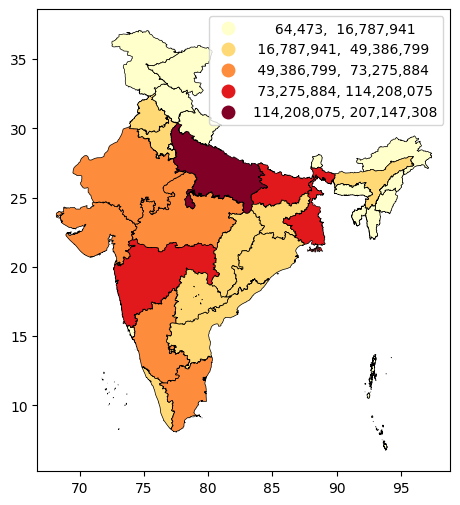

In [6]:
states.plot(figsize=(8,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

## CRIME

In [7]:
df_crime.columns

Index(['States/UTs', 'District', 'Year', 'Murder', 'Attempt to commit Murder',
       'Culpable Homicide not amounting to Murder',
       'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape',
       'Custodial_Gang Rape', 'Custodial_Other Rape',
       'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others',
       'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
       'Kidnapping & Abduction', 'Kidnapping & Abduction in order to Murder',
       'Kidnapping for Ransom',
       'Kidnapping & Abduction of Women to compel her for marriage',
       'Other Kidnapping', 'Dacoity', 'Dacoity with Murder', 'Other Dacoity',
       'Making Preparation and Assembly for committing Dacoity', 'Robbery',
       'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary',
       'House Trespass & House Breaking', 'Theft', 'Auto Theft',
       'Other Thefts', 'Unlawful Assembly', 'Riots', 'Riots_Communal',
       'Riots_Industrial', 'Riots_Political', 'Riots_Caste Conflict',


In [8]:
crime = df_crime.groupby('States/UTs')['Total Cognizable IPC crimes'].sum().reset_index()
crime['States/UTs'] = crime['States/UTs'].str.upper()
crime.rename(columns= {'States/UTs':'STATE'}, inplace=True)
states.rename(columns= {'statename':'STATE'}, inplace=True)

In [9]:
# USING FUZZYWUZZY
crime["best_match"] = crime["STATE"].map(lambda x: process.extractOne(x,states["STATE"])[0] )

In [10]:
crime_pop = pd.merge(states, crime,left_on='STATE', right_on='best_match',how='outer',indicator=True)

In [12]:
crime_pop["crime_popu"] = (crime_pop['Total Cognizable IPC crimes'] /(crime_pop["totalpopul"]/1000))

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :NCT OF DELHI, Min :MEGHALAYA')

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :MADHYA PRADESH, Min :LAKSHADWEEP')

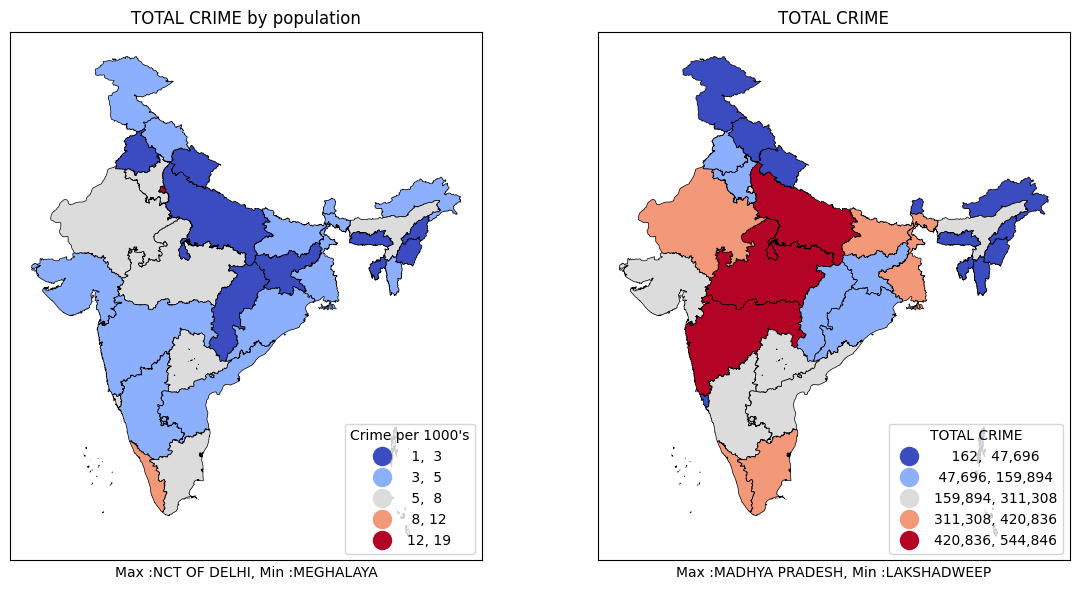

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
crime_pop.plot(ax=ax1,column='crime_popu',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Crime per 1000's''')
ax1.title.set_text("TOTAL CRIME by population")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel(f"Max :{crime_pop.loc[crime_pop['crime_popu'].idxmax(), 'STATE_x']}, Min :{crime_pop.loc[crime_pop['crime_popu'].idxmin(), 'STATE_x']}")


crime_pop.plot(ax=ax2,column='Total Cognizable IPC crimes',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''TOTAL CRIME''')
ax2.title.set_text("TOTAL CRIME")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel(f"Max :{crime_pop.loc[crime_pop['Total Cognizable IPC crimes'].idxmax(), 'STATE_x']}, Min :{crime_pop.loc[crime_pop['Total Cognizable IPC crimes'].idxmin(), 'STATE_x']}")

plt.tight_layout()

plt.show()

## Literacy

In [14]:
literacy = df_edu.groupby('statename')['overall_literacy'].mean().reset_index() # Mean
schools = df_edu.groupby('statename')['no_of_schools'].sum().reset_index()
education = pd.merge(literacy, schools ,on = "statename", how='outer',indicator=False)
#FuzzyWuzzy
education["best_match"] = education["statename"].map(lambda x: process.extractOne(x,states["STATE"])[0] )

In [15]:
edu_pop = pd.merge(states, education,left_on='STATE', right_on='best_match',how='outer',indicator=True)

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'max literacy rate: KERALA , min literacy rate: BIHAR')

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'max schools : UTTAR PRADESH , min schools : LAKSHADWEEP')

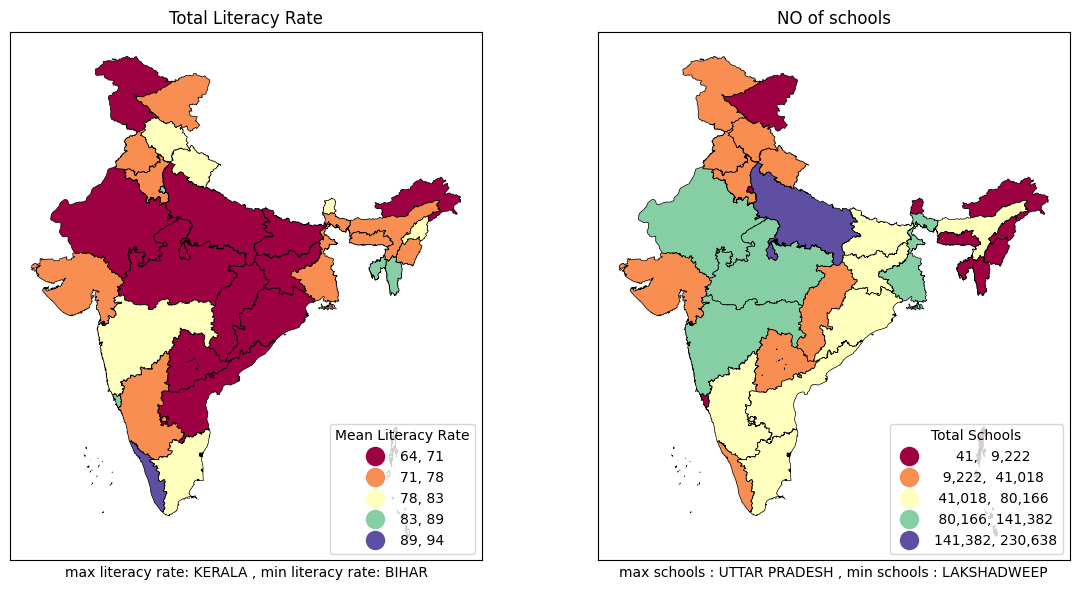

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

edu_pop.plot(ax=ax1,column='overall_literacy',legend=True,cmap='Spectral',scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Mean Literacy Rate''')
ax1.title.set_text("Total Literacy Rate")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax1.set_xlabel(f"max literacy rate: {edu_pop.loc[edu_pop['overall_literacy'].idxmax(), 'STATE']} , min literacy rate: {edu_pop.loc[edu_pop['overall_literacy'].idxmin(), 'STATE']}")

edu_pop.plot(ax=ax2,column='no_of_schools',legend=True,cmap='Spectral',scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''Total Schools''')
ax2.title.set_text("NO of schools")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_xlabel(f"max schools : {edu_pop.loc[edu_pop['no_of_schools'].idxmax(), 'STATE']} , min schools : {edu_pop.loc[edu_pop['no_of_schools'].idxmin(), 'STATE']}")


plt.tight_layout()

plt.show()

# Literacy and Crime

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :KERALA, Min :BIHAR')

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :MADHYA PRADESH, Min :LAKSHADWEEP')

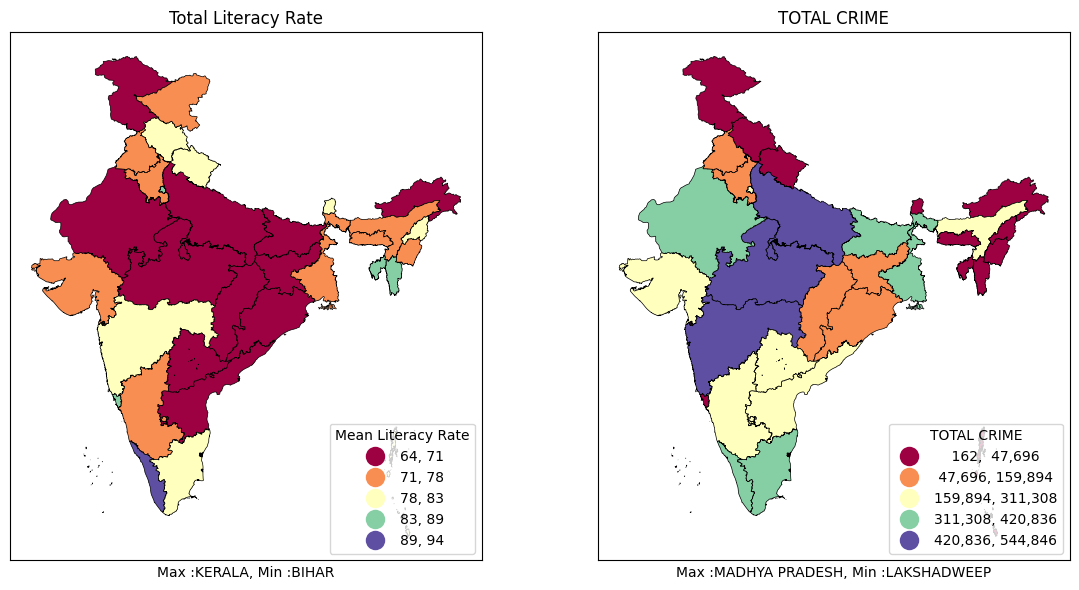

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

edu_pop.plot(ax=ax1,column='overall_literacy',legend=True,cmap='Spectral',scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Mean Literacy Rate''')
ax1.title.set_text("Total Literacy Rate")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax1.set_xlabel(f"Max :{edu_pop.loc[edu_pop['overall_literacy'].idxmax(), 'best_match']}, Min :{edu_pop.loc[edu_pop['overall_literacy'].idxmin(), 'best_match']}")

crime_pop.plot(ax=ax2,column='Total Cognizable IPC crimes',legend=True,cmap='Spectral',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''TOTAL CRIME''')
ax2.title.set_text("TOTAL CRIME")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_xlabel(f"Max :{crime_pop.loc[crime_pop['Total Cognizable IPC crimes'].idxmax(), 'STATE_x']}, Min :{crime_pop.loc[crime_pop['Total Cognizable IPC crimes'].idxmin(), 'STATE_x']}")

plt.tight_layout()

plt.show()

In [ ]:
# There is an expectation of an inverse relationship between crime rates and literacy rates.
# However, this relationship does not hold true for a significant portion of India's regions.
# For instance, in states like Kerala, Tamil Nadu, and Maharashtra, both crime rates and literacy rates are on the rise.
# Conversely, in many eastern Indian states, crime rates tend to be low in areas where literacy rates are also low.
# The only exception to this trend is found in states like Rajasthan, Madhya Pradesh, Uttar Pradesh, Bihar, and West Bengal, where crime rates are elevated, while literacy rates remain comparatively lower.

In [18]:
C1c = crime_pop.copy()
C1c["geometry"] = C1c["geometry"].centroid
crime_up_literacy_down = states.query("STATE=='BIHAR'| STATE == 'UTTAR PRADESH' | STATE =='MADHYA PRADESH' | STATE =='RAJASTHAN' | STATE == 'WEST BENGAL'")

<ipython-input-18-fa318228087d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  C1c["geometry"] = C1c["geometry"].centroid


<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Literacy rate(bg) |crime'}>

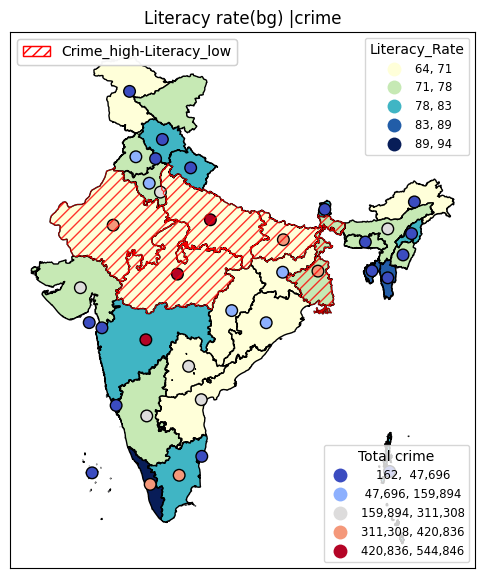

In [19]:
fig, ax = plt.subplots(1, figsize=(6,14))
edu_pop.plot(ax=ax,column='overall_literacy',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Literacy_Rate''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
C1c.plot(ax=ax,column='Total Cognizable IPC crimes',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 70)


ax.title.set_text("Literacy rate(bg) |crime")

l2 = ax.get_legend()
l2.set_title('''Total''')

crime_up_literacy_down.plot(ax=ax,edgecolor='red',linewidth=.5, facecolor="none",alpha=.8,hatch='///')
l1 = ax.get_legend()
l1.set_title('''Total crime''')


bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Crime_high-Literacy_low')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)


# Unemployment

In [20]:
df_unemp["approx_2014"]  = df_unemp[['2011-12', '2017-18']].mean(axis=1)
# manually creating colfor year 2014

<ipython-input-20-5640958fa6a8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_unemp["approx_2014"]  = df_unemp[['2011-12', '2017-18']].mean(axis=1)


In [21]:
df_unemp['State/Union Territory'] = df_unemp['State/Union Territory'].str.upper()
df_unemp.rename(columns= {'State/Union Territory':'STATE'}, inplace=True)
df_unemp.drop(df_unemp.index[-1], inplace=True)

In [24]:
df_unemp["best_match"] = df_unemp["STATE"].map(lambda x: process.extractOne(x,states["STATE"])[0])

In [25]:
unemp = df_unemp[["approx_2014","best_match"]]

In [26]:
unemp_pop = pd.merge(states, unemp,left_on='STATE', right_on='best_match',how='outer',indicator=True)

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :NAGALAND, Min :MEGHALAYA')

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :KERALA, Min :BIHAR')

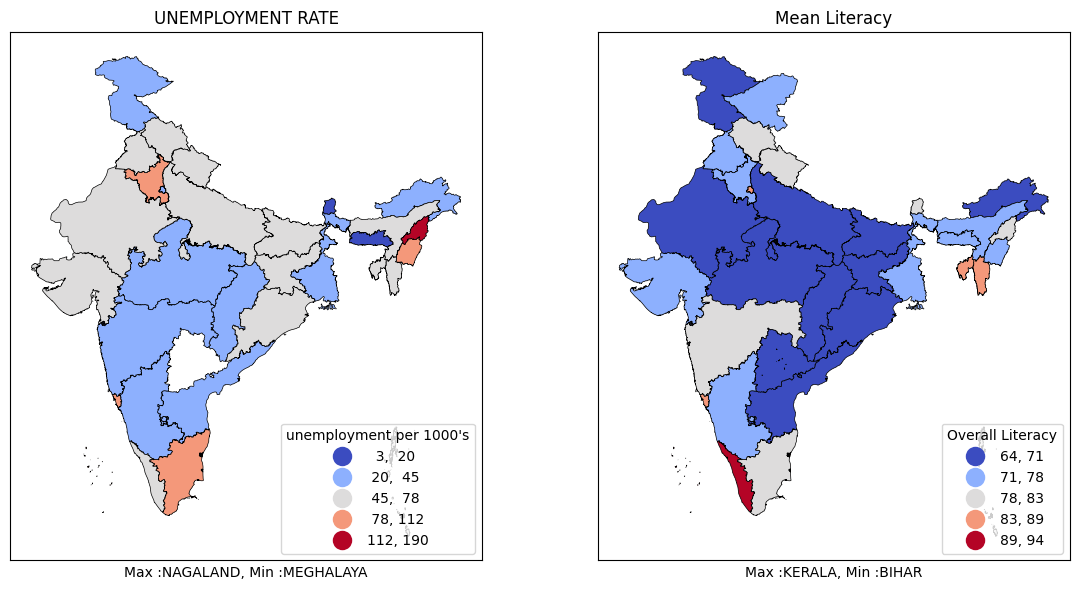

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
unemp_pop.plot(ax=ax1,column='approx_2014',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''unemployment per 1000's''')
ax1.title.set_text("UNEMPLOYMENT RATE")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel(f"Max :{unemp_pop.loc[unemp_pop['approx_2014'].idxmax(), 'best_match']}, Min :{unemp_pop.loc[unemp_pop['approx_2014'].idxmin(), 'best_match']}")


edu_pop.plot(ax=ax2,column='overall_literacy',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''Overall Literacy''')
ax2.title.set_text("Mean Literacy")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel(f"Max :{edu_pop.loc[edu_pop['overall_literacy'].idxmax(), 'best_match']}, Min :{edu_pop.loc[edu_pop['overall_literacy'].idxmin(), 'best_match']}")


plt.tight_layout()

plt.show()

In [ ]:
# we should expect HI unemployment when Literacy is Low
# Haryana, manipur and nagaland satisfies the above clause
#Goa,Tamilnadu and kerala have HI literacy but still the Unemployment there is noticable.


# LITERACY | CRIME | UNEMPLOYMENT

In [ ]:
## LITERACY(BASE) | CRIME | UNEMPLOYMENT

In [28]:
U1c = unemp_pop.copy()
U1c["geometry"] = U1c["geometry"].centroid

#crime up and literacy down
crime_up_literacy_down = states.query("STATE=='BIHAR'| STATE == 'UTTAR PRADESH' | STATE =='MADHYA PRADESH' | STATE =='RAJASTHAN' | STATE == 'WEST BENGAL'")
unemp_up_literacy_down = states.query("STATE=='HARYANA'| STATE == 'MANIPUR' | STATE == 'NAGALAND'")

<ipython-input-28-fe385dc7a880>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  U1c["geometry"] = U1c["geometry"].centroid


<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Literacy/Crime Relationship')

[]

[]

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Literacy/Unemployment')

[]

[]

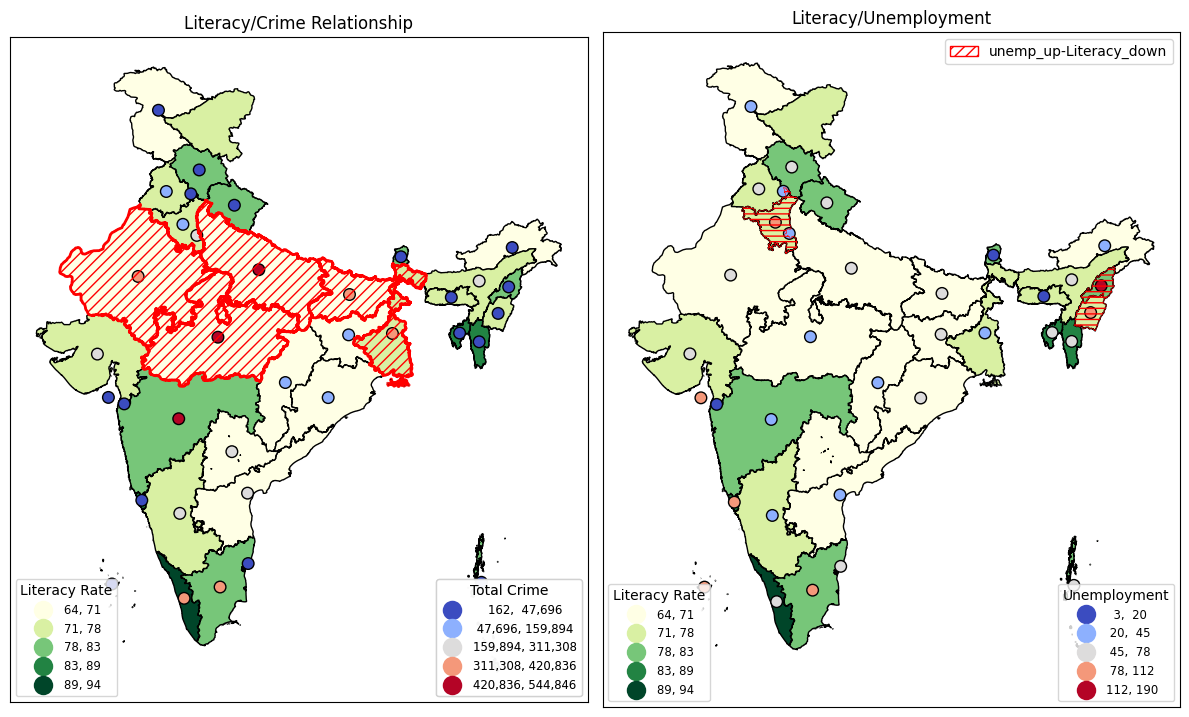

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

# First subplot (left)
ax = axs[0]
edu_pop.plot(ax=ax, column='overall_literacy', legend=True, cmap='YlGn', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
          'loc':'lower left', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('Literacy Rate')

C1c.plot(ax=ax, column='Total Cognizable IPC crimes', legend=True, cmap='coolwarm', scheme='natural_breaks', k=5,
           edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
          'loc':'lower right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4},
          markersize=70)

crime_up_literacy_down.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

ax.set_title("Literacy/Crime Relationship")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('Total Crime')

ax.add_artist(l2)
ax.add_artist(l1)

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'crime_up-Literacy_down')
l1=plt.legend(handles=[bluePatch],loc='upper left')


# Second subplot (right)
ax = axs[1]
edu_pop.plot(ax=ax, column='overall_literacy', legend=True, cmap='YlGn', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
          'loc':'lower left', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('Literacy Rate')

U1c.plot(ax=ax, column='approx_2014', legend=True, cmap='coolwarm', scheme='natural_breaks', k=5,
           edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
          'loc':'lower right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4},
          markersize=70)

unemp_up_literacy_down.plot(ax=ax,edgecolor='red',linewidth=.3, facecolor="none",alpha=1,hatch='---')

ax.set_title("Literacy/Unemployment")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('Unemployment')

ax.add_artist(l2)
ax.add_artist(l1)



bluePatch1 = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'unemp_up-Literacy_down')
l2=plt.legend(handles=[bluePatch1],loc='upper right')


plt.tight_layout()

plt.show()


In [ ]:
# We should expect HI unemployment when Literacy is Low
# Unemployment is HI and Literacy is LOW: Haryana, manipur and nagaland
# Goa,Tamilnadu and kerala have HI literacy but still the Unemployment there is noticable.

# Exception Cases:
# Both, Crime and literacy are HI: Kerala,TamilNadu, Maharshtra
# Both, Crime and Literacy are LOW: Most of East India
# Both unemployment and Literacy are HI: Goa,tamilnadu,kerala

# SUICIDE

In [30]:
df_suicide_main = pd.read_csv("suicide.csv")


In [31]:
df_suicide_main.head()

,States/UTs,Year,CrimeHead,Male,Female,Transgender,Total
0,Andhra Pradesh,2014,No Education,927,470,0,1397
1,Andhra Pradesh,2014,Primary (upto class-5),743,385,0,1128
2,Andhra Pradesh,2014,Middle (upto class-8),630,343,0,973
3,Andhra Pradesh,2014,Matriculate/Secondary (upto class-10),657,306,0,963
4,Andhra Pradesh,2014,Higher Secondary/ Intermediate/ Pre-University...,395,150,0,545


In [32]:
values_to_drop = ['Total (All India)', 'Total (States)', 'Total (UTs)','No Education','Status not known','Total','Professionals (MBA; etc.)','Graduate and above']
filtered_df = df_suicide.copy()
filtered_df.drop(filtered_df[filtered_df['CrimeHead'].str.contains('|'.join(values_to_drop))].index, inplace=True)
filtered_df.drop(filtered_df[filtered_df['CrimeHead'] == 'Professionals (MBA; etc.)'].index, inplace=True)



<ipython-input-32-25289fb52ce9>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df.drop(filtered_df[filtered_df['CrimeHead'].str.contains('|'.join(values_to_drop))].index, inplace=True)


In [33]:
columns_to_drop = ['Year', 'CrimeHead', 'Male', 'Female', 'Transgender']
filtered_df.drop(columns=columns_to_drop, inplace=True)

In [34]:
suicide = filtered_df.groupby('States/UTs').sum().reset_index()

In [35]:
values_to_drop = ['Total (All India)', 'Total (States)', 'Total (UTs)']
suicide = suicide[~suicide['States/UTs'].isin(values_to_drop)]

In [36]:
suicide["best_match"] = suicide["States/UTs"].map(lambda x: process.extractOne(x,states["STATE"])[0])
suicide_unemp = pd.merge(states, suicide,left_on='STATE', right_on='best_match',how='outer',indicator=True)

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :MAHARASHTRA, Min :LAKSHADWEEP')

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'Max :NAGALAND, Min :MEGHALAYA')

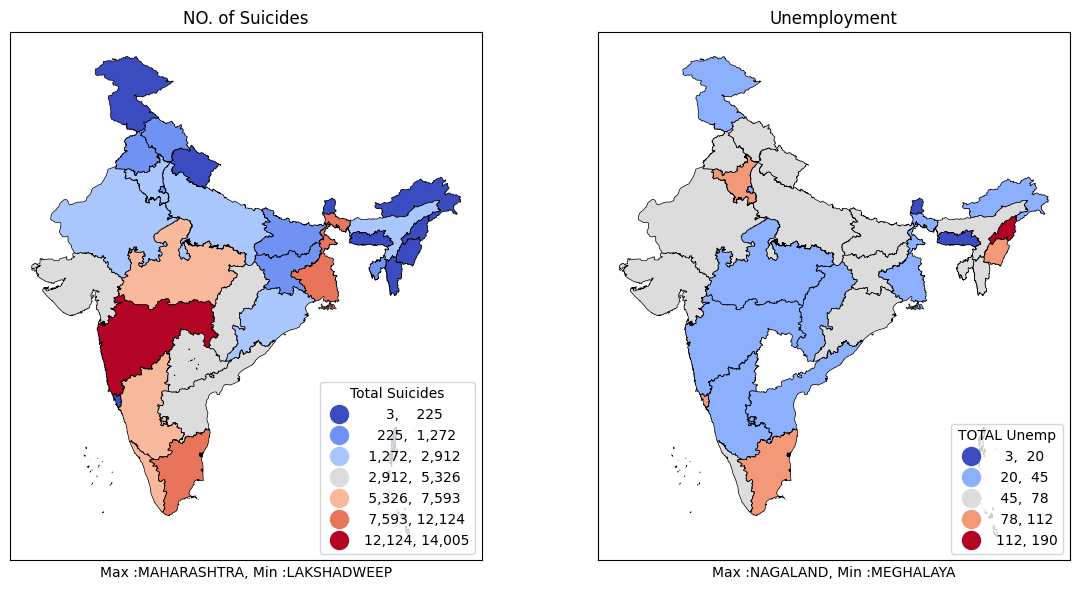

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

suicide_unemp.plot(ax=ax1,column='Total',legend=True,cmap='coolwarm',scheme='natural_breaks',k=7, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Total Suicides''')
ax1.title.set_text("NO. of Suicides")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax1.set_xlabel(f"Max :{suicide_unemp.loc[suicide_unemp['Total'].idxmax(), 'best_match']}, Min :{suicide_unemp.loc[suicide_unemp['Total'].idxmin(), 'best_match']}")

unemp_pop.plot(ax=ax2,column='approx_2014',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''TOTAL Unemp''')
ax2.title.set_text("Unemployment")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_xlabel(f"Max :{unemp_pop.loc[unemp_pop['approx_2014'].idxmax(), 'best_match']}, Min :{unemp_pop.loc[unemp_pop['approx_2014'].idxmin(), 'best_match']}")

plt.tight_layout()

plt.show()

# UNEMPLOYMENT(BASE) | SUICIDE | CRIME

In [37]:
S1c = suicide_unemp.copy()
S1c["geometry"] = S1c["geometry"].centroid
unemp_up_crime_up = states.query("STATE=='RAJASTHAN'| STATE == 'UTTAR PRADESH' | STATE == 'TAMIL NADU' | STATE == 'KERALA' | STATE =='BIHAR'")
unemp_up_suicide_up = states.query("STATE=='KERALA' | STATE == 'TAMIL NADU'")

<ipython-input-37-423a7dbdbd4a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  S1c["geometry"] = S1c["geometry"].centroid


<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Unemployement/Crime Relationship')

[]

[]

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Unemployment/Suicide')

[]

[]

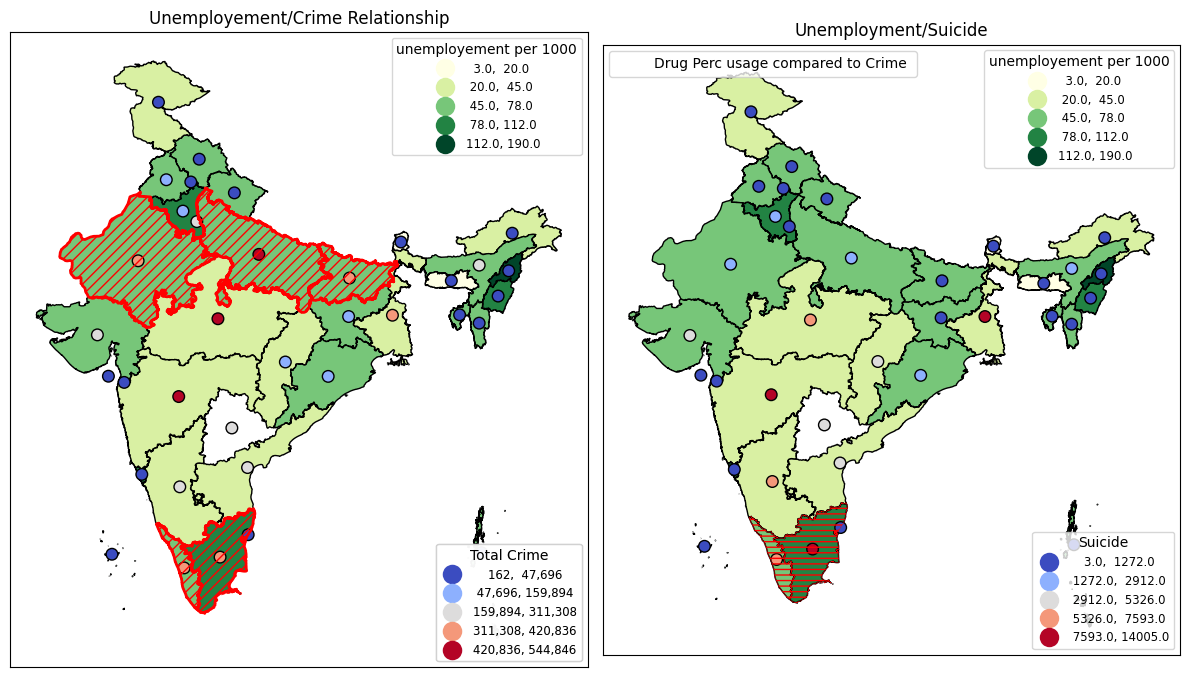

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

# First subplot (left)
ax = axs[0]
unemp_pop.plot(ax=ax, column='approx_2014', legend=True, cmap='YlGn', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:}",
          'loc':'upper right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('unemployement per 1000')

C1c.plot(ax=ax, column='Total Cognizable IPC crimes', legend=True, cmap='coolwarm', scheme='natural_breaks', k=5,
           edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
          'loc':'lower right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4},
          markersize=70)

unemp_up_crime_up.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

ax.set_title("Unemployement/Crime Relationship")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('Total Crime')

ax.add_artist(l2)
ax.add_artist(l1)


# Second subplot (right)
ax = axs[1]
unemp_pop.plot(ax=ax, column='approx_2014', legend=True, cmap='YlGn', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:}",
          'loc':'upper right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('unemployement per 1000')

S1c.plot(ax=ax, column='Total', legend=True, cmap='coolwarm', scheme='natural_breaks', k=5,
           edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:}",
          'loc':'lower right', 'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4},
          markersize=70)

unemp_up_suicide_up.plot(ax=ax,edgecolor='red',linewidth=.3, facecolor="none",alpha=1,hatch='---')

ax.set_title("Unemployment/Suicide")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('Suicide')

ax.add_artist(l2)
ax.add_artist(l1)

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='white', facecolor='none',
                     hatch='---', label=r'Drug Perc usage compared to Crime ')

l2=plt.legend(handles=[bluePatch],loc='upper left')

plt.tight_layout()

plt.show()


In [ ]:
# Unemp and Suicide are HI: TAMILNADU,KERALA
# Unemp and crime is HI: UP,BIHAR,RAJASTHAN,TAMILNADU,KERALA

# Exception Cases:
# Unemp is LOW but Suicide and Crime are Hi: MP,Maharshtra,WEST BENGAL
# Unemp is Hi but Suicide is LOW: East India

# PLOTTING GRAPHS

In [38]:
# Tree Map
df = df_suicide_main
px.treemap(df, path=[px.Constant("States/UTs"), 'CrimeHead', 'Total'], values='Male',
                  color='CrimeHead', hover_data=['CrimeHead'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Female'], weights=df['Male']))
#aok: maybe can restructure this; and interpret--what are the conclusions here

In [ ]:
px.scatter(df_suicide_main, x="CrimeHead", y="States/UTs", color="Total",
                  hover_data=['Total'],width=1000,height=600)

#aok: this is not useful

Text(0.5, 0.98, 'Relationship Between Literacy Rate and Unemployment (2014)')

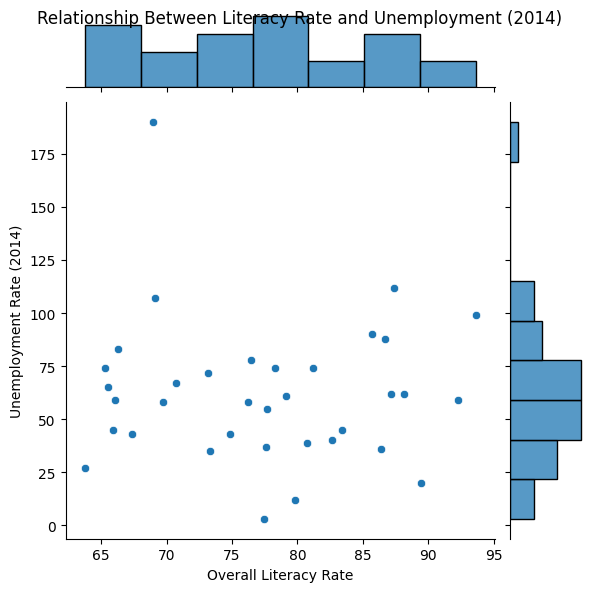

In [ ]:
plot = sns.jointplot(y=unemp["approx_2014"], x=edu_pop['overall_literacy'])
plot.set_axis_labels(xlabel="Overall Literacy Rate", ylabel="Unemployment Rate (2014)")
plot.fig.suptitle("Relationship Between Literacy Rate and Unemployment (2014)")
sns.set_style("whitegrid")
plt.show()


Text(0.5, 0.98, 'Relationship Between Literacy Rate and Total IPC Crimes')

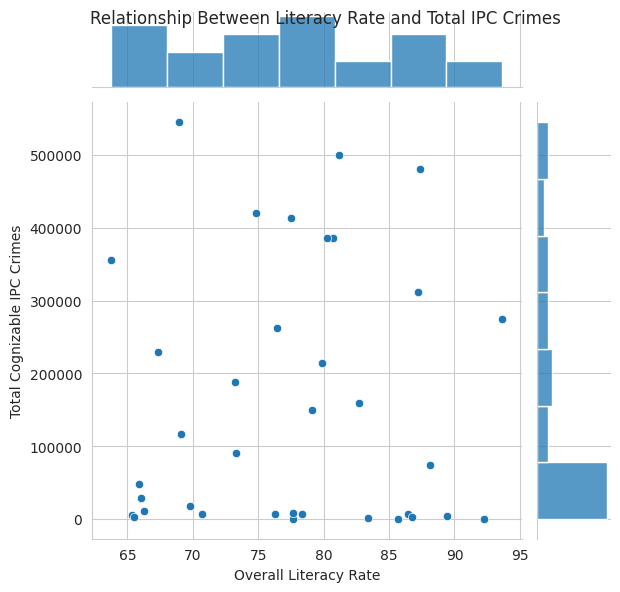

In [ ]:
plot = sns.jointplot(y=crime["Total Cognizable IPC crimes"], x=edu_pop['overall_literacy'])
plot.set_axis_labels(xlabel="Overall Literacy Rate", ylabel="Total Cognizable IPC Crimes")
plot.fig.suptitle("Relationship Between Literacy Rate and Total IPC Crimes")
sns.set_style("whitegrid")
plt.show()

Text(0.5, 0.98, 'Relationship Between Unemployment Rate and Total IPC Crimes')

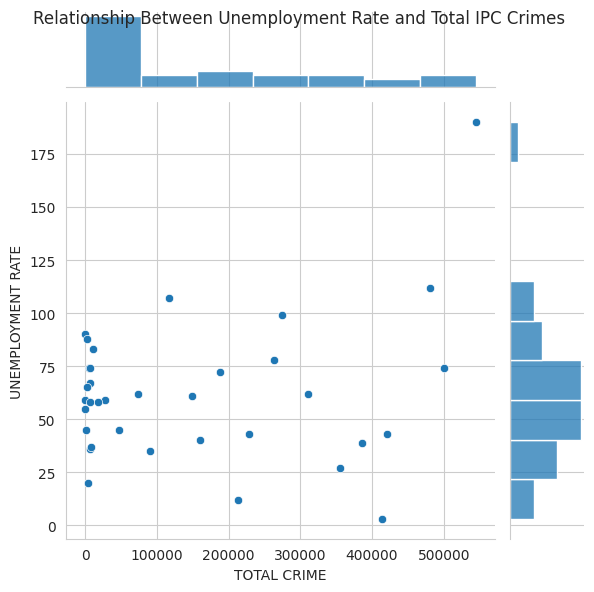

In [ ]:
plot = sns.jointplot(y =unemp["approx_2014"], x =crime["Total Cognizable IPC crimes"])
plot.set_axis_labels(xlabel="TOTAL CRIME", ylabel="UNEMPLOYMENT RATE")
plot.fig.suptitle("Relationship Between Unemployment Rate and Total IPC Crimes")
sns.set_style("whitegrid")
plt.show()

Text(0.5, 0.98, 'Relationship Between Unemployment Rate and Suicides')

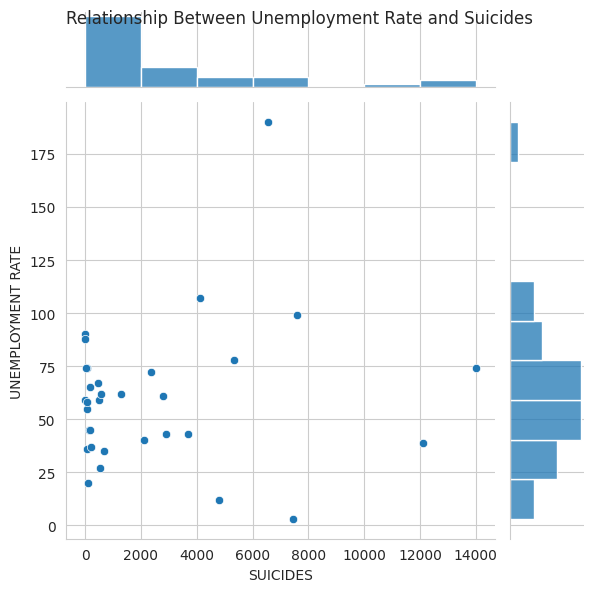

In [ ]:
plot = sns.jointplot(y =unemp["approx_2014"], x =suicide['Total'])
plot.set_axis_labels(xlabel="SUICIDES", ylabel="UNEMPLOYMENT RATE")
plot.fig.suptitle("Relationship Between Unemployment Rate and Suicides")
sns.set_style("whitegrid")
plt.show()

Text(0.5, 0.98, 'Relationship Between Literacy Rate and Suicides')

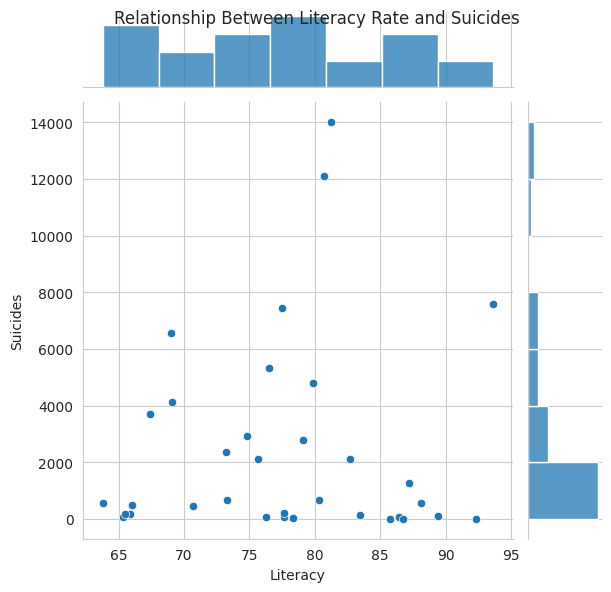

In [ ]:
plot = sns.jointplot(y =suicide["Total"], x =edu_pop['overall_literacy'])
plot.set_axis_labels(xlabel="Literacy", ylabel="Suicides")
plot.fig.suptitle("Relationship Between Literacy Rate and Suicides")
sns.set_style("whitegrid")
plt.show()

In [ ]:
education.columns

Index(['statename', 'overall_literacy', 'no_of_schools', 'best_match'], dtype='object')

In [ ]:
import plotly.graph_objects as go

In [ ]:
norm_crime = pd.DataFrame()
norm_crime['Total Cognizable IPC crimes'] = (crime['Total Cognizable IPC crimes'] - crime['Total Cognizable IPC crimes'].min()) / (crime['Total Cognizable IPC crimes'].max() - crime['Total Cognizable IPC crimes'].min())
norm_crime['education'] = (education['overall_literacy'] - education['overall_literacy'].min()) / (education['overall_literacy'].max() - education['overall_literacy'].min())

In [ ]:
norm_crime["State"] = education["best_match"]

aok: the following ones are good; line plots are typically for timesseries, but it works here

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

# Add lines for income and literacy rate
fig.add_trace(go.Scatter(x=norm_crime['State'], y=norm_crime['Total Cognizable IPC crimes'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig.add_trace(go.Scatter(x=norm_crime['State'], y=norm_crime['education'], mode='lines', name='education', line=dict(color='#D11E5D')))

# Update layout
fig.update_layout(
    title='crime vs edu',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Literacy Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

fig.show()


In [ ]:
df_spam = pd.DataFrame()

In [ ]:
df_spam['unemp'] = unemp["approx_2014"]
df_spam['literacy'] = edu_pop['overall_literacy']
df_spam['states'] = unemp["best_match"]

In [ ]:
px.scatter(df_spam, x="states", y="unemp", color="literacy",
                  hover_data=['literacy'],width=1000,height=600)

# Folium and Choreograph

In [ ]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')


import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
crime_dist = pd.DataFrame()
crime_dist = df_crime[['States/UTs', 'District','Total Cognizable IPC crimes']]
Ind_dist = Ind[["statename","distname","totalpopul","geometry"]]
Ind_dist.loc[:, 'statename'] = Ind_dist['statename'].str.upper().copy()
crime_dist.loc[:, "States/UTs"] = crime_dist["States/UTs"].str.upper().copy()

<ipython-input-58-88f6984be1e8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-88f6984be1e8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_data = Ind_dist.loc[Ind_dist['statename'] == 'LADAKH', 'distname']
print(filtered_data)

691          Kargil
692    Leh (Ladakh)
Name: distname, dtype: object


In [ ]:
crime_dist["best_match"] = crime_dist["States/UTs"].map(lambda x: process.extractOne(x,Ind_dist["statename"])[0] )
crime_dist.rename(columns={'best_match': 'statename'}, inplace=True)
crime_dist.drop(columns='States/UTs', inplace=True)


<ipython-input-60-d18aa25370e3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-d18aa25370e3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-d18aa25370e3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from fuzzywuzzy import process

def fuzzy_match(row):
    statename_crime_dist = row['statename']
    matching_statename_row = Ind_dist[Ind_dist['statename'] == statename_crime_dist]

    if not matching_statename_row.empty:
        distnames = matching_statename_row['distname'].tolist()
        match = process.extractOne(row['District'], distnames)

        if match[1] >= 70:
            return match[0]

    return None

crime_dist['Districct'] = crime_dist.apply(lambda row: fuzzy_match(row) if row['statename'] == row['statename'] else None, axis=1)


<ipython-input-61-5240d9739e02>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
crime_dist["Districct"].isna().sum()

129

In [ ]:
crime_Ind_dist = pd.merge(Ind_dist, crime_dist,left_on='distname', right_on='Districct',how='outer',indicator=True)

<Axes: >

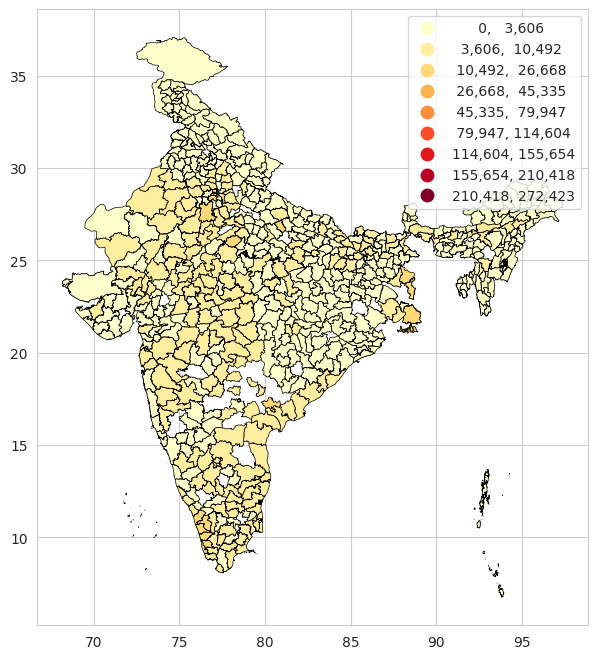

In [ ]:
crime_Ind_dist.plot(figsize=(15,8),column= 'Total Cognizable IPC crimes',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=9,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

#aok boundary lines should be thinner and think maybe about different ramp like GnYlRd
#to have more colors and maybe differnt bins so there is more variability in colors in map,
#as of now almost all is yellow

In [ ]:
# import pandas as pd
# import folium
# from folium.plugins import HeatMap
# from geopy.geocoders import Nominatim

# # Assuming you have crime_Ind_dist_copy DataFrame with 'Districct' and 'income' columns

# # Initialize the Nominatim geocoder
# crime_Ind_dist_copy = crime_Ind_dist.copy()

# geolocator = Nominatim(user_agent='blah@gmail.com')

# def get_coordinates(location):
#     try:
#         # Geocode the location
#         geo_location = geolocator.geocode(location)
#         if geo_location:
#             return geo_location.latitude, geo_location.longitude
#     except Exception as e:
#         print(f"Error: {e}")
#     return None, None

# # Apply geocoding to the 'Districct' column to obtain latitude and longitude
# crime_Ind_dist_copy[['latitude', 'longitude']] = crime_Ind_dist_copy['Districct'].apply(lambda x: pd.Series(get_coordinates(x)))

# # Define boundaries for India
# india_boundaries = {
#     'min_lat': 8.4,
#     'max_lat': 37.6,
#     'min_lon': 68.1,
#     'max_lon': 97.4
# }

# # Filter coordinates within India's boundaries
# crime_Ind_dist_copy = crime_Ind_dist_copy[
#     (crime_Ind_dist_copy['latitude'].between(india_boundaries['min_lat'], india_boundaries['max_lat'])) &
#     (crime_Ind_dist_copy['longitude'].between(india_boundaries['min_lon'], india_boundaries['max_lon']))
# ]

# # Create a folium map centered around the mean coordinates of states
# m = folium.Map(location=[crime_Ind_dist_copy['latitude'].mean(), crime_Ind_dist_copy['longitude'].mean()], zoom_start=4)

# # Create a heatmap using the income data
# HeatMap(crime_Ind_dist_copy[['latitude', 'longitude', 'Total Cognizable IPC crimes']].dropna().values, radius=15, blur=10).add_to(m)

# # Save the map to an HTML file
# m.save('map_with_heatmap_within_india.html')



In [ ]:
# m

In [ ]:
! wget -q -O police.csv https://drive.google.com/uc?id=1-TKo187C6imZ3kzqIjfxc_bN3gx3GnP7&export=download

df_police = pd.read_csv("police.csv")

In [ ]:
# import folium
# from folium.plugins import MarkerCluster


# m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# marker_cluster = MarkerCluster().add_to(m)

# def add_marker(row):
#     folium.Marker(location=[row['Y'], row['X']], popup=row['name']).add_to(marker_cluster)

# df_police.apply(add_marker, axis=1)

# m.save('police-stations.html')
# m

In [ ]:
crime_pop.columns
crime_pop.dropna(inplace=True)

Index(['STATE_x', 'distarea', 'totalpopul', 'totpopmale', 'totpopfema',
       'geometry', 'STATE_y', 'Total Cognizable IPC crimes', 'best_match',
       '_merge', 'crime_popu'],
      dtype='object')

In [ ]:
crime_pop.dtypes

STATE_x                          object
distarea                        float64
totalpopul                      float64
totpopmale                      float64
totpopfema                      float64
geometry                       geometry
STATE_y                          object
Total Cognizable IPC crimes     float64
best_match                       object
_merge                         category
crime_popu                      float64
dtype: object

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

gdf = gpd.GeoDataFrame(crime_pop, geometry='geometry')


In [ ]:
gdf = gpd.GeoDataFrame(crime_pop, geometry='geometry')

In [ ]:
# import folium
# from folium.plugins import MarkerCluster


# gdf_json = gdf.to_crs(epsg='4326').to_json()

# center_location = [gdf.geometry.centroid.y.mean(),gdf.geometry.centroid.x.mean()]

# # Create a Folium map with default settings
# m = folium.Map(location = center_location,zoon_start = 2)

# # Add the choropleth layer to the map
# choropleth_layer = folium.Choropleth(
#     geo_data=gdf_json,
#     name='choropleth',
#     data=gdf,
#     columns=['Total Cognizable IPC crimes','totalpopul'],
#     key_on='feature.properties.Total Cognizable IPC crimes',
#     fill_color='PuRd',
#     fill_opacity=0.7,

#     line_opacity=0.2,
#     legend_name='Crime',
#     highlight=True,
#     line_color='black',
#     line_weight=1.0
# ).add_to(m)

# marker_cluster = MarkerCluster().add_to(m)

# for idx, police in df_police.iterrows():
#     folium.Marker(
#         location=[police['Y'], police['X']],
#         popup=f'police at ({police["Y"]}, {police["X"]})',
#         icon=folium.Icon(color='green', icon='info-sign')
#     ).add_to(marker_cluster)

# # Add a legend
# folium.LayerControl().add_to(m)

# m


# plotting graphs

In [ ]:
import plotly.graph_objects as go
import pandas as pd

In [ ]:
# CRIME | EDUCATION
norm_crime = pd.DataFrame()
norm_crime['Total Cognizable IPC crimes'] = (crime['Total Cognizable IPC crimes'] - crime['Total Cognizable IPC crimes'].min()) / (crime['Total Cognizable IPC crimes'].max() - crime['Total Cognizable IPC crimes'].min())
norm_crime['education'] = (education['overall_literacy'] - education['overall_literacy'].min()) / (education['overall_literacy'].max() - education['overall_literacy'].min())
norm_crime["State"] = education["best_match"]

fig = go.Figure()

fig1 = fig.add_trace(go.Scatter(x=norm_crime['State'], y=norm_crime['Total Cognizable IPC crimes'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig1 = fig.add_trace(go.Scatter(x=norm_crime['State'], y=norm_crime['education'], mode='lines', name='education', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='crime vs edu',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Literacy Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()


In [ ]:
# CRIME | SUICIDE
norm_c_s = pd.DataFrame()
norm_c_s['Total Cognizable IPC crimes'] = (crime['Total Cognizable IPC crimes'] - crime['Total Cognizable IPC crimes'].min()) / (crime['Total Cognizable IPC crimes'].max() - crime['Total Cognizable IPC crimes'].min())
norm_c_s['sside'] = (suicide['Total'] - suicide['Total'].min()) / (suicide['Total'].max() - suicide['Total'].min())
norm_c_s["State"] = suicide["best_match"]

fig = go.Figure()

fig1 = fig.add_trace(go.Scatter(x=norm_c_s['State'], y=norm_c_s['Total Cognizable IPC crimes'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig1 = fig.add_trace(go.Scatter(x=norm_c_s['State'], y=norm_c_s['sside'], mode='lines', name='suicide', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='crime vs suicide',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized suicide Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()


In [ ]:
# CRIME | UNEMP
norm_c_u = pd.DataFrame()
norm_c_u['Total Cognizable IPC crimes'] = (crime['Total Cognizable IPC crimes'] - crime['Total Cognizable IPC crimes'].min()) / (crime['Total Cognizable IPC crimes'].max() - crime['Total Cognizable IPC crimes'].min())
norm_c_u['unemp'] = (unemp['approx_2014'] - unemp['approx_2014'].min()) / (unemp['approx_2014'].max() - unemp['approx_2014'].min())
norm_c_u["State"] = unemp["best_match"]

fig = go.Figure()

fig1 = fig.add_trace(go.Scatter(x=norm_c_u['State'], y=norm_c_u['Total Cognizable IPC crimes'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig1 = fig.add_trace(go.Scatter(x=norm_c_u['State'], y=norm_c_u['unemp'], mode='lines', name='Unemployment', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='crime vs unemployment',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Unemp Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()

In [ ]:
# SUICIDE | UNEMP
norm_s_u = pd.DataFrame()
norm_s_u["sside"] = (suicide['Total'] - suicide['Total'].min()) / (suicide['Total'].max() - suicide['Total'].min())
norm_s_u['unemp'] = (unemp['approx_2014'] - unemp['approx_2014'].min()) / (unemp['approx_2014'].max() - unemp['approx_2014'].min())
norm_s_u["State"] = unemp["best_match"]

fig = go.Figure()

fig1 = fig.add_trace(go.Scatter(x=norm_s_u['State'], y=norm_s_u['sside'], mode='lines', name='suicide', line=dict(color='#53D1BA')))
fig1 = fig.add_trace(go.Scatter(x=norm_s_u['State'], y=norm_s_u['unemp'], mode='lines', name='Unemployment', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='suicide vs unemployment',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Unemp Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()

In [ ]:
merged_data = crime.merge(suicide, on='best_match').merge(unemp, on='best_match').merge(education, on='best_match')

selected_columns = merged_data[['Total Cognizable IPC crimes', 'Total', 'approx_2014', 'overall_literacy']]
selected_columns.rename(columns={'Total': 'sside_rate'}, inplace=True)
selected_columns.rename(columns={'approx_2014': 'Unemp_rate'}, inplace=True)
corr_matrix = selected_columns.corr()



<ipython-input-79-0ec1a10a4ae6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-0ec1a10a4ae6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-80-1d08b53def30>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-80-1d08b53def30>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



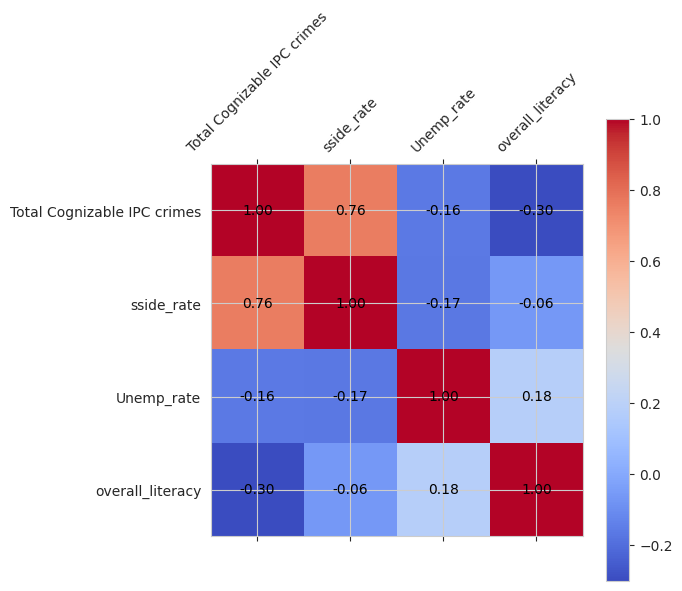

In [ ]:
#aok this could be something to start with; and then move on to other graphs
def display_corr_matrix():
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(corr_matrix, cmap='coolwarm')

    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

    plt.colorbar(cax)
    ax.set_xticklabels([''] + list(corr_matrix.columns), rotation=45)
    ax.set_yticklabels([''] + list(corr_matrix.index))
    plt.show()
# Display the correlation matrix plot with values inside the boxes
display_corr_matrix()

In [ ]:
# So as we can see, there is a signigicant positive corelation b/w CRIME and SUICIDES(0.76), while there is a significant negative corelation b/w CRIME and LITERACY(-.30)

In [ ]:
# To do, establish relationship b/w:

# crime against women | suicide rate of women
# crime in Finance | unemployment
# Education | Suicide upto High school students
# Suicide after graduation | unemployment